## Deep learning models
#### Import packages, load data and define necussary function

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
#read the training dataset after resampling and standardization
df = pd.read_csv('train_scaled.pca.csv')

#remove class and id
features = list(df.columns.values)
features.remove('class')
features.remove('id')

X = df[features]
y = df['class']
#split to train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.7)

#set up the test set
df_test = pd.read_csv('test_scaled.csv')
features_test = list(df_test.columns.values)
features_test.remove('class')
features_test.remove('id')

X_test = df_test[features_test]

In [3]:
#define the function for sensitivity, specificity and f1 score
def ss(X, y, m):
    cm = confusion_matrix(y, np.rint(m.predict(X)))
    sen = cm[0][0] / (cm[0][0] + cm[0][1])
    spe = cm[1][1] / (cm[1][0] + cm[1][1])
    prec = cm[0][0] / (cm[0][0] + cm[1][0])
    f1 = 2 * prec * sen / (prec + sen)
    return sen, spe, f1

#### Define and train the data on three different models

The first model is a simple neural network with regular densely-connected NN layers. The second model is GRU (a type of RNN model) and the third model is another RNN model called LSTM.

In [4]:
#set the model
#this is a Neural Network which four layers. 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(40,)), #confirm the input shape
    keras.layers.Dense(256, activation=tf.nn.relu), 
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid), 
])

#RMSprop, Adam, Adamax, Nadam
opt = keras.optimizers.Adamax(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2)

Epoch 1/150
2/2 [==============================] - 2s 515ms/step - loss: 0.7315 - accuracy: 0.6082 - val_loss: 1.0709 - val_accuracy: 0.5200
Epoch 2/150
2/2 [==============================] - 0s 58ms/step - loss: 0.4869 - accuracy: 0.7835 - val_loss: 0.7972 - val_accuracy: 0.5600
Epoch 3/150
2/2 [==============================] - 0s 65ms/step - loss: 0.2730 - accuracy: 0.8763 - val_loss: 0.7480 - val_accuracy: 0.6000
Epoch 4/150
2/2 [==============================] - 0s 60ms/step - loss: 0.1965 - accuracy: 0.9485 - val_loss: 0.7487 - val_accuracy: 0.7600
Epoch 5/150
2/2 [==============================] - 0s 64ms/step - loss: 0.1127 - accuracy: 0.9588 - val_loss: 0.8103 - val_accuracy: 0.7600
Epoch 6/150
2/2 [==============================] - 0s 68ms/step - loss: 0.0718 - accuracy: 0.9897 - val_loss: 0.8808 - val_accuracy: 0.7600
Epoch 7/150
2/2 [==============================] - 0s 62ms/step - loss: 0.0554 - accuracy: 0.9897 - val_loss: 0.9737 - val_accuracy: 0.7600
Epoch 8/150
2/2 [==

2/2 [==============================] - 0s 58ms/step - loss: 3.0146e-04 - accuracy: 1.0000 - val_loss: 1.9983 - val_accuracy: 0.7200
Epoch 59/150
2/2 [==============================] - 0s 61ms/step - loss: 2.9499e-04 - accuracy: 1.0000 - val_loss: 2.0020 - val_accuracy: 0.7200
Epoch 60/150
2/2 [==============================] - 0s 61ms/step - loss: 2.8965e-04 - accuracy: 1.0000 - val_loss: 2.0057 - val_accuracy: 0.7200
Epoch 61/150
2/2 [==============================] - 0s 63ms/step - loss: 2.8392e-04 - accuracy: 1.0000 - val_loss: 2.0095 - val_accuracy: 0.7200
Epoch 62/150
2/2 [==============================] - 0s 67ms/step - loss: 2.7879e-04 - accuracy: 1.0000 - val_loss: 2.0132 - val_accuracy: 0.7200
Epoch 63/150
2/2 [==============================] - 0s 67ms/step - loss: 2.7361e-04 - accuracy: 1.0000 - val_loss: 2.0166 - val_accuracy: 0.7200
Epoch 64/150
2/2 [==============================] - 0s 63ms/step - loss: 2.6863e-04 - accuracy: 1.0000 - val_loss: 2.0198 - val_accuracy: 0.720

2/2 [==============================] - 0s 66ms/step - loss: 1.4031e-04 - accuracy: 1.0000 - val_loss: 2.1309 - val_accuracy: 0.7200
Epoch 115/150
2/2 [==============================] - 0s 59ms/step - loss: 1.3889e-04 - accuracy: 1.0000 - val_loss: 2.1327 - val_accuracy: 0.7200
Epoch 116/150
2/2 [==============================] - 0s 59ms/step - loss: 1.3757e-04 - accuracy: 1.0000 - val_loss: 2.1345 - val_accuracy: 0.7200
Epoch 117/150
2/2 [==============================] - 0s 68ms/step - loss: 1.3610e-04 - accuracy: 1.0000 - val_loss: 2.1362 - val_accuracy: 0.7200
Epoch 118/150
2/2 [==============================] - 0s 70ms/step - loss: 1.3480e-04 - accuracy: 1.0000 - val_loss: 2.1378 - val_accuracy: 0.7200
Epoch 119/150
2/2 [==============================] - 0s 58ms/step - loss: 1.3354e-04 - accuracy: 1.0000 - val_loss: 2.1394 - val_accuracy: 0.7200
Epoch 120/150
2/2 [==============================] - 0s 61ms/step - loss: 1.3216e-04 - accuracy: 1.0000 - val_loss: 2.1411 - val_accuracy:

In [5]:
#evaluate the model on validation set
valid_loss_nn, valid_acc_nn = model.evaluate(X_valid, y_valid)
print('Valid accuracy:', valid_acc_nn)

#for roc plot
y_pre_nn = model.predict(X_valid).ravel()
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_valid, y_pre_nn)
auc_nn = auc(fpr_nn, tpr_nn)
print("AUC on validation set:", auc_nn)

#sensitivity, specificity and f1 score
sen_nn, spe_nn, f1_nn = ss(X_valid, y_valid, model)
print("Sencitivity for neural network:", sen_nn)
print("Specifity for neural network:", spe_nn)
print("F1 score for neural network:", f1_nn)

9/9 [==============================] - 0s 3ms/step - loss: 0.9552 - accuracy: 0.8427
Valid accuracy: 0.8426573276519775
AUC on validation set: 0.9181867083964986
Sencitivity for neural network: 0.9090909090909091
Specifity for neural network: 0.7762237762237763
F1 score for neural network: 0.8524590163934426


In [6]:
X_train = X_train.values.reshape(-1, 1, 40)
X_valid = X_valid.values.reshape(-1, 1, 40)
X_test  = X_test.values.reshape(-1, 1, 753)

In [7]:
#set the GUR model 
grumodel = keras.Sequential([
    keras.layers.GRU(256, input_shape=(1,40)),
    keras.layers.Dense(128, activation=tf.nn.softmax),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid), 
])

#RMSprop, Adam, Adamax, Nadam
opt = keras.optimizers.RMSprop(learning_rate=0.001)
grumodel.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

grumodel.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.6927 - accuracy: 0.7113 - val_loss: 0.6914 - val_accuracy: 0.7200
Epoch 2/100
1/1 [==============================] - 0s 75ms/step - loss: 0.6901 - accuracy: 0.7526 - val_loss: 0.6905 - val_accuracy: 0.5200
Epoch 3/100
1/1 [==============================] - 0s 79ms/step - loss: 0.6866 - accuracy: 0.7938 - val_loss: 0.6881 - val_accuracy: 0.6800
Epoch 4/100
1/1 [==============================] - 0s 76ms/step - loss: 0.6828 - accuracy: 0.8454 - val_loss: 0.6871 - val_accuracy: 0.6000
Epoch 5/100
1/1 [==============================] - 0s 76ms/step - loss: 0.6773 - accuracy: 0.8247 - val_loss: 0.6841 - val_accuracy: 0.6400
Epoch 6/100
1/1 [==============================] - 0s 75ms/step - loss: 0.6714 - accuracy: 0.9072 - val_loss: 0.6825 - val_accuracy: 0.6000
Epoch 7/100
1/1 [==============================] - 0s 72ms/step - loss: 0.6646 - accuracy: 0.9278 - val_loss: 0.6793 - val_accuracy: 0.6400
Epoch 8/100
1/1 [=====

1/1 [==============================] - 0s 88ms/step - loss: 0.2329 - accuracy: 1.0000 - val_loss: 0.6022 - val_accuracy: 0.6800
Epoch 60/100
1/1 [==============================] - 0s 76ms/step - loss: 0.2267 - accuracy: 1.0000 - val_loss: 0.6033 - val_accuracy: 0.6800
Epoch 61/100
1/1 [==============================] - 0s 74ms/step - loss: 0.2214 - accuracy: 1.0000 - val_loss: 0.6036 - val_accuracy: 0.6800
Epoch 62/100
1/1 [==============================] - 0s 72ms/step - loss: 0.2166 - accuracy: 1.0000 - val_loss: 0.6056 - val_accuracy: 0.6800
Epoch 63/100
1/1 [==============================] - 0s 76ms/step - loss: 0.2111 - accuracy: 1.0000 - val_loss: 0.6075 - val_accuracy: 0.6800
Epoch 64/100
1/1 [==============================] - 0s 71ms/step - loss: 0.2063 - accuracy: 1.0000 - val_loss: 0.6094 - val_accuracy: 0.6800
Epoch 65/100
1/1 [==============================] - 0s 74ms/step - loss: 0.2014 - accuracy: 1.0000 - val_loss: 0.6110 - val_accuracy: 0.6800
Epoch 66/100
1/1 [========

In [8]:
#evaluate the model on validation set
valid_loss_gru, valid_acc_gru =grumodel.evaluate(X_valid, y_valid)
print('Valid accuracy:', valid_acc_gru)

#for roc plot
y_pre_gru = grumodel.predict(X_valid).ravel()
fpr_gru, tpr_gru, thresholds_gru = roc_curve(y_valid, y_pre_gru)
auc_gru = auc(fpr_gru, tpr_gru)
print("AUC on validation set:", auc_gru)

#sensitivity, specificity and f1 score
sen_gru, spe_gru, f1_gru = ss(X_valid, y_valid, grumodel)
print("Sencitivity for GRU:", sen_gru)
print("Specifity for GRU:", spe_gru)
print("F1 score for GRU:", f1_gru)

9/9 [==============================] - 0s 5ms/step - loss: 0.4608 - accuracy: 0.8252
Valid accuracy: 0.8251748085021973
AUC on validation set: 0.9182356105433029
Sencitivity for GRU: 0.9300699300699301
Specifity for GRU: 0.7202797202797203
F1 score for GRU: 0.8417721518987342


In [11]:
#set the LSTM model
lstmmodel = keras.Sequential([
    keras.layers.LSTM(256, input_shape=(1,40)),
    keras.layers.Dense(64, activation=tf.nn.softmax),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid), 
])

#RMSprop, Adam, Adamax, Nadam
opt = keras.optimizers.RMSprop(learning_rate=0.01)
lstmmodel.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

lstmmodel.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.6934 - accuracy: 0.4948 - val_loss: 0.6910 - val_accuracy: 0.4800
Epoch 2/100
1/1 [==============================] - 0s 70ms/step - loss: 0.6869 - accuracy: 0.5052 - val_loss: 0.6660 - val_accuracy: 0.6400
Epoch 3/100
1/1 [==============================] - 0s 81ms/step - loss: 0.6406 - accuracy: 0.9175 - val_loss: 0.6539 - val_accuracy: 0.5600
Epoch 4/100
1/1 [==============================] - 0s 78ms/step - loss: 0.5684 - accuracy: 0.9485 - val_loss: 0.6412 - val_accuracy: 0.6000
Epoch 5/100
1/1 [==============================] - 0s 82ms/step - loss: 0.5009 - accuracy: 0.9794 - val_loss: 0.6327 - val_accuracy: 0.6800
Epoch 6/100
1/1 [==============================] - 0s 79ms/step - loss: 0.4496 - accuracy: 0.9897 - val_loss: 0.6004 - val_accuracy: 0.7200
Epoch 7/100
1/1 [==============================] - 0s 80ms/step - loss: 0.4045 - accuracy: 1.0000 - val_loss: 0.6015 - val_accuracy: 0.7200
Epoch 8/100
1/1 [=====

1/1 [==============================] - 0s 78ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 1.0718 - val_accuracy: 0.7200
Epoch 60/100
1/1 [==============================] - 0s 77ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 1.0856 - val_accuracy: 0.7200
Epoch 61/100
1/1 [==============================] - 0s 76ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 1.0985 - val_accuracy: 0.7200
Epoch 62/100
1/1 [==============================] - 0s 81ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 1.1117 - val_accuracy: 0.7200
Epoch 63/100
1/1 [==============================] - 0s 75ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 1.1233 - val_accuracy: 0.7200
Epoch 64/100
1/1 [==============================] - 0s 73ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 1.1362 - val_accuracy: 0.7200
Epoch 65/100
1/1 [==============================] - 0s 82ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 1.1488 - val_accuracy: 0.7200
Epoch 66/100
1/1 [========

In [12]:
#evaluate the model on validation set
valid_loss_lstm, valid_acc_lstm = lstmmodel.evaluate(X_valid, y_valid)
print('Valid accuracy:', valid_acc_lstm)

#for roc plot
y_pre_lstm = lstmmodel.predict(X_valid).ravel()
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_valid, y_pre_lstm)
auc_lstm = auc(fpr_lstm, tpr_lstm)
print("AUC on validation set:", auc_lstm)

#sensitivity, specificity and f1 score
sen_lstm, spe_lstm, f1_lstm = ss(X_valid, y_valid, lstmmodel)
print("Sencitivity for LSTM:", sen_lstm)
print("Specifity for LSTM:", spe_lstm)
print("F1 score for LSTM:", f1_lstm)

9/9 [==============================] - 0s 5ms/step - loss: 0.8485 - accuracy: 0.8392
Valid accuracy: 0.8391608595848083
AUC on validation set: 0.9148124602670057
Sencitivity for LSTM: 0.8951048951048951
Specifity for LSTM: 0.7832167832167832
F1 score for LSTM: 0.847682119205298


There is one main problem with deep learning models, all of the three models are not robust enough, possible reasons are:

(1) The dataset is not large enough to train a powerful and robust deep learning model;

(2) There are too many hyperparameters in these three models, and it takes time to do a grid search to find the best combination.

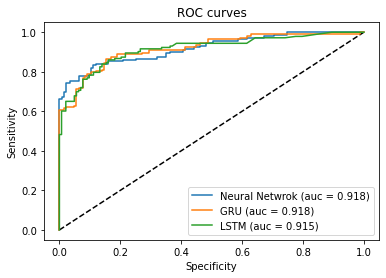

In [13]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn, tpr_nn, label='Neural Netwrok (auc = {:.3f})'.format(auc_nn))
plt.plot(fpr_gru, tpr_gru, label='GRU (auc = {:.3f})'.format(auc_gru))
plt.plot(fpr_lstm, tpr_lstm, label='LSTM (auc = {:.3f})'.format(auc_lstm))
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curves')
plt.legend(loc='best')
plt.show()